In [1]:
import pandas as pd
from turtle import color
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from pyclustering.cluster.clique import clique, clique_visualizer

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [32]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [35]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[: , :].values

### K-Means

In [52]:
X_kmeans = X.copy()
inertia = []
for n in range(1 , 12):
    algorithm = KMeans(n_clusters=n)
    algorithm.fit(X_kmeans)
    inertia.append(algorithm.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


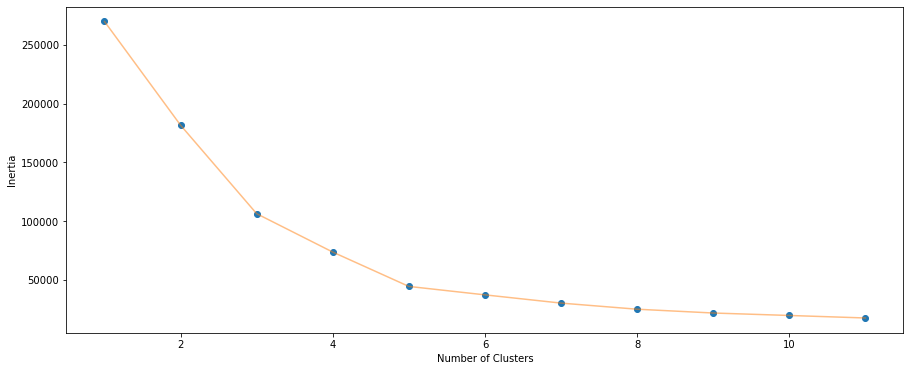

In [53]:
plt.figure(figsize = (15 ,6))
plt.plot(np.arange(1 , 12) , inertia , 'o')
plt.plot(np.arange(1 , 12) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [54]:
model = KMeans(n_clusters=5).fit(X_kmeans)
labels = model.labels_
centroids = model.cluster_centers_

In [57]:
h = 0.02
x_min, x_max = X_kmeans[:, 0].min() - 1, X_kmeans[:, 0].max() + 1
y_min, y_max = X_kmeans[:, 1].min() - 1, X_kmeans[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

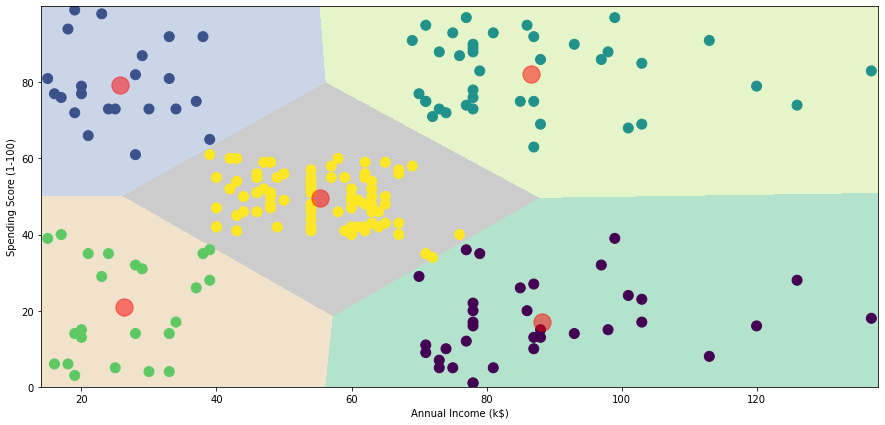

In [58]:
plt.figure(figsize=(15 , 7))
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=df , c=labels , s=100 )
plt.scatter(x=centroids[: , 0], y=centroids[: , 1], s=300 , c='red' , alpha=0.5)
plt.ylabel('Spending Score (1-100)'), plt.xlabel('Annual Income (k$)')
plt.show()